In [120]:
import pandas as pd
import numpy as np

In [121]:
df = pd.read_csv('sysbench_run.csv',on_bad_lines='skip')

In [122]:
df.columns = df.iloc[0]

In [123]:
df = df[1:]

In [124]:
df.columns

Index([                               'Utilization (%)',
                                             'Eff Freq',
                                     'IPC (Sys + User)',
                                     'CPI (Sys + User)',
                           'Branch Misprediction Ratio',
                            'IC (32B) Fetch Miss Ratio',
                      'Op Cache (64B) Fetch Miss Ratio',
                                      'IC Access (pti)',
                                        'IC Miss (pti)',
                                      'DC Access (pti)',
                         'DC Fills From Same CCX (pti)',
       'DC Fills From different CCX in same node (pti)',
                     'DC Fills From Local Memory (pti)',
                 'DC Fills From Remote CCX Cache (pti)',
                    'DC Fills From Remote Memory (pti)',
                                   'All DC Fills (pti)',
                                      'L2 Access (pti)',
                         'L2 Ac

In [125]:
df = df.iloc[:,:-1]

In [126]:
df = df.astype(float)

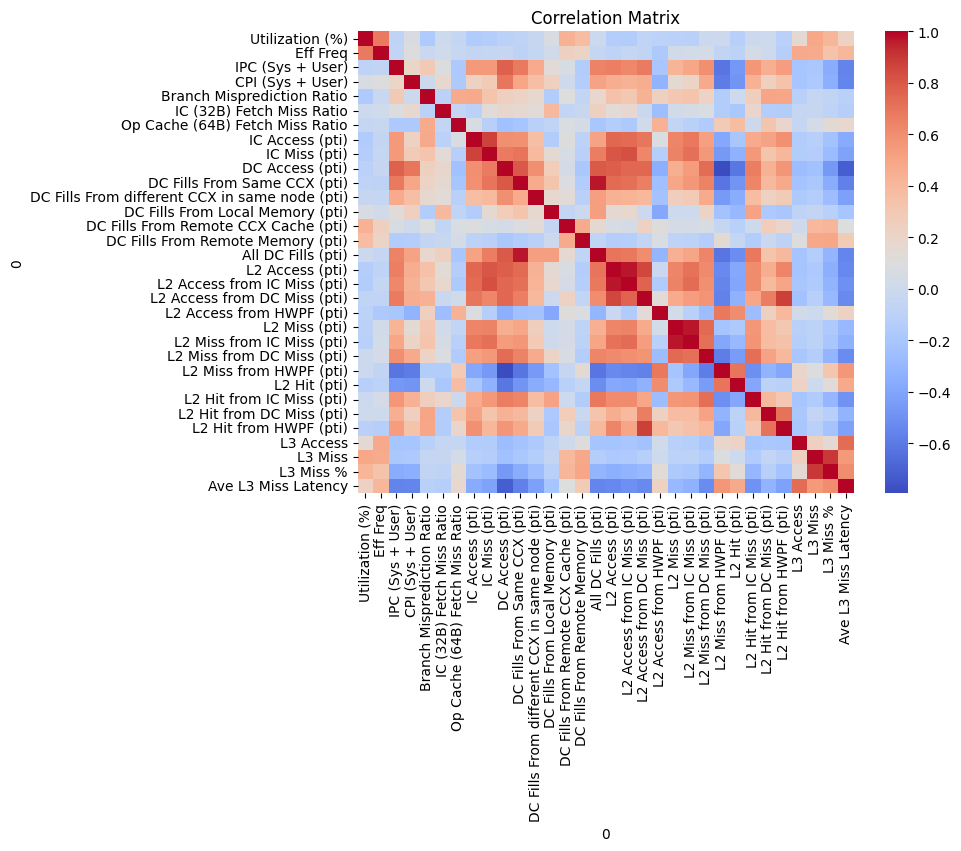

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [128]:
df.corr()['IPC (Sys + User)']

0
Utilization (%)                                  -0.079809
Eff Freq                                         -0.071337
IPC (Sys + User)                                  1.000000
CPI (Sys + User)                                  0.196070
Branch Misprediction Ratio                        0.297170
IC (32B) Fetch Miss Ratio                         0.095696
Op Cache (64B) Fetch Miss Ratio                  -0.184405
IC Access (pti)                                   0.551015
IC Miss (pti)                                     0.549061
DC Access (pti)                                   0.770321
DC Fills From Same CCX (pti)                      0.681477
DC Fills From different CCX in same node (pti)    0.469852
DC Fills From Local Memory (pti)                  0.135380
DC Fills From Remote CCX Cache (pti)              0.065395
DC Fills From Remote Memory (pti)                -0.150825
All DC Fills (pti)                                0.649377
L2 Access (pti)                                   0.66

In [130]:
df.head()

0  Utilization (%)  Eff Freq  IPC (Sys + User)  CPI (Sys + User)  \
1             0.97   1486.38              0.46              2.19   
2             1.27   1496.56              0.00              0.00   
3             0.90   1515.57              0.73              1.36   
4             0.98   1379.23              0.00              0.00   
5             0.67   1504.17              0.65              1.54   

0  Branch Misprediction Ratio  IC (32B) Fetch Miss Ratio  \
1                        0.05                       0.22   
2                        0.00                       0.00   
3                        0.04                       0.27   
4                        0.00                       0.00   
5                        0.05                       0.00   

0  Op Cache (64B) Fetch Miss Ratio  IC Access (pti)  IC Miss (pti)  \
1                             0.45           245.43          53.11   
2                             0.00             0.00           0.00   
3                             0.00           211.80          57.20   
4                             0.00             0.00           0.00   
5                             0.63           523.57           0.00   

0  DC Access (pti)  ...  L2 Miss from DC Miss (pti)  L2 Miss from HWPF (pti)  \
1           627.53  ...                       13.01                    10.59   
2             0.00  ...                        0.00                     0.00   
3           638.35  ...                       15.51                    14.13   
4             0.00  ...                        0.00                     0.00   
5             0.00  ...                        0.00                    16.71   

0  L2 Hit (pti)  L2 Hit from IC Miss (pti)  L2 Hit from DC Miss (pti)  \
1         48.99                      33.68                       4.58   
2          0.00                       0.00                       0.00   
3         49.84                      36.83                       5.69   
4          0.00                       0.00                       0.00   
5         46.28                      17.19                       6.76   

0  L2 Hit from HWPF (pti)  L3 Access  L3 Miss  L3 Miss %  Ave L3 Miss Latency  
1                    6.47     7940.0   1058.0      13.32               285.38  
2                    0.00        0.0      0.0       0.00                 0.00  
3                    7.28    13150.0   1554.0      11.82               257.37  
4                    0.00        0.0      0.0       0.00                 0.00  
5                   11.28    22882.0   2797.0      12.22               260.74  

[5 rows x 32 columns]

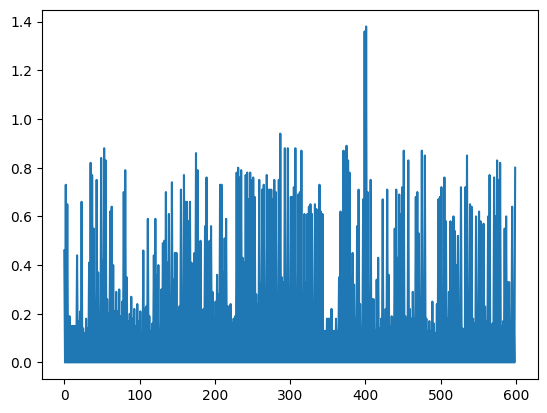

In [131]:
plt.plot(np.arange(len(df['IPC (Sys + User)'])),df['IPC (Sys + User)'])
plt.show()

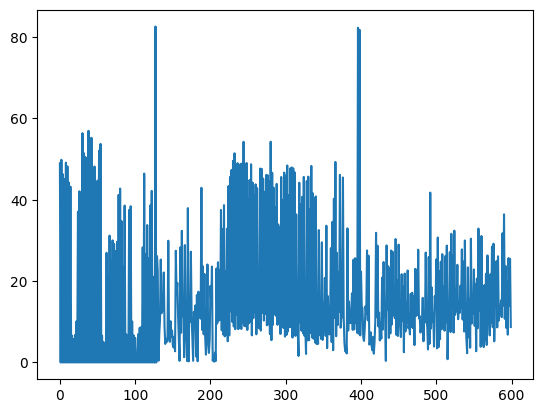

In [132]:
plt.plot(np.arange(len(df['L2 Hit (pti)'])),df['L2 Hit (pti)'])
plt.show()

In [133]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [134]:
y = df['IPC (Sys + User)']
df.drop('IPC (Sys + User)',inplace=True,axis=1)
X = df

In [135]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=102)

In [166]:
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


regressor = ensemble.GradientBoostingRegressor(**params)
regressor.fit(X_train,Y_train)

mse = mean_squared_error(Y_test, regressor.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0214


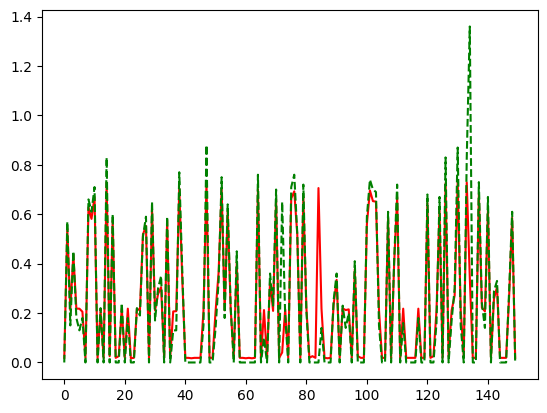

In [157]:
plt.plot(np.arange(len(X_test)),regressor.predict(X_test),'r')
plt.plot(np.arange(len(X_test)),Y_test,'g--')

plt.show()

In [158]:
mse = mean_squared_error(Y_test, regressor.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0143


In [184]:
df_test = pd.read_csv('test1.csv',on_bad_lines='skip')
df_test.columns = df_test.iloc[0]
df_test = df_test[1:]
df_test = df_test.iloc[:,:-1]
df_test = df_test.astype(float)
y_true_test = df_test['IPC (Sys + User)']
df_test.drop('IPC (Sys + User)',inplace=True,axis=1)
X_true_test = df_test

In [192]:
mse = mean_squared_error(y_true_test[100:], regressor.predict(X_true_test[50:]))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0062


/tmp/ipykernel_34868/1048519628.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  mse = mean_squared_error(y_true_test[100:], regressor.predict(X_true_test[100:]))


/tmp/ipykernel_34868/2102722681.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.arange(100),y_true_test[100:200],'g--')


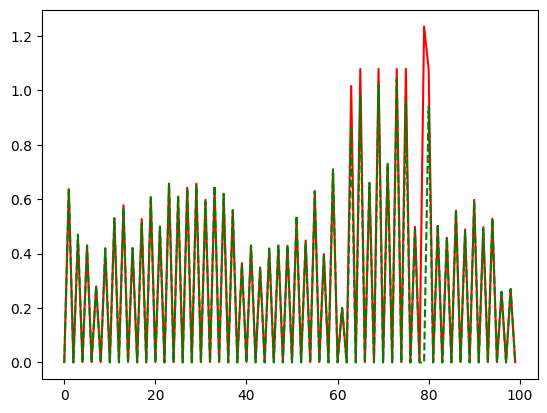

In [189]:
plt.plot(np.arange(100),regressor.predict(X_true_test)[100:200],'r')
plt.plot(np.arange(100),y_true_test[100:200],'g--')

plt.show()

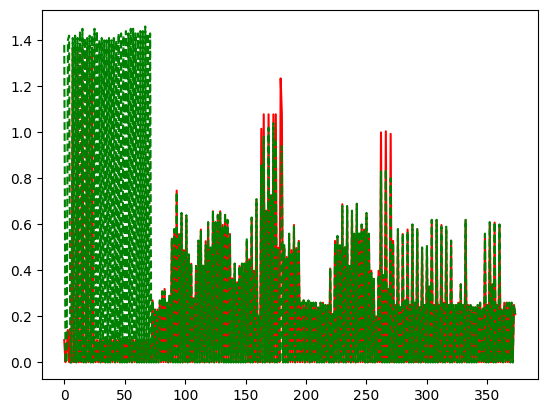

In [188]:
plt.plot(np.arange(len(X_true_test)),regressor.predict(X_true_test),'r')
plt.plot(np.arange(len(X_true_test)),y_true_test,'g--')

plt.show()